Gaussian Discriminant Analysis

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

(50, 2)


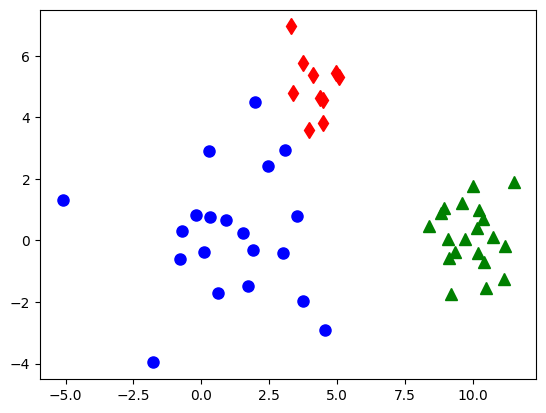

In [38]:
centroids = np.array([[0, 0], [5, 5], [10, 0]])

# Generate data
np.random.seed(0)
X0 = np.random.randn(20, 2) * 2 + centroids[0]
X1 = np.random.randn(10, 2) + centroids[1]
X2 = np.random.randn(20, 2) + centroids[2]
X = np.vstack((X0, X1, X2))

# Plot data
plt.plot(X0[:, 0], X0[:, 1], 'bo', markersize=8)
plt.plot(X1[:, 0], X1[:, 1], 'rd', markersize=8)
plt.plot(X2[:, 0], X2[:, 1], 'g^', markersize=8)

$$p(\mathcal{D} \mid \boldsymbol{\theta})=\prod_{n=1}^N \mathcal{M}\left(y_n \mid \boldsymbol{\pi}\right) \prod_{c=1}^C \mathcal{N}\left(\boldsymbol{x}_n \mid \boldsymbol{\mu}_c, \boldsymbol{\Sigma}_c\right)^{\mathbb{I}\left(y_n=c\right)} $$

(50, 2)


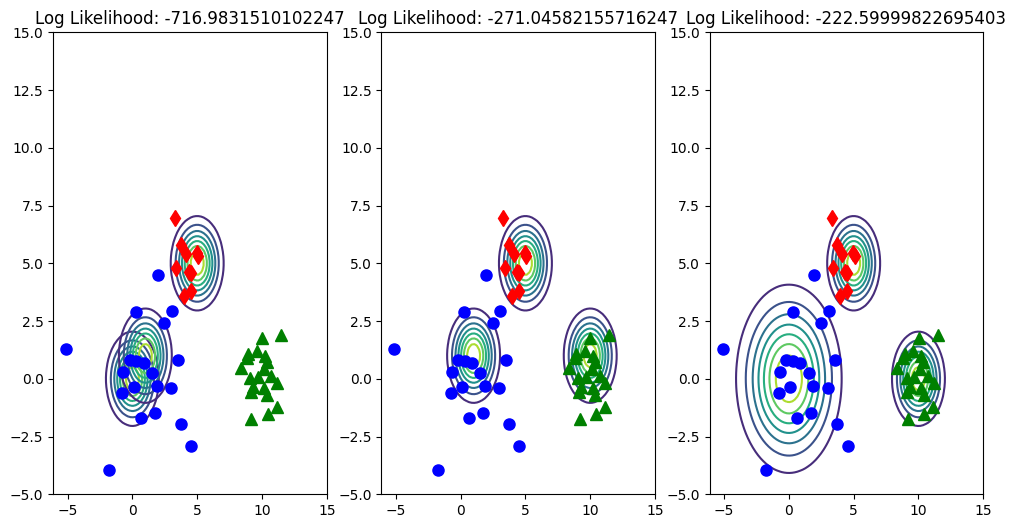

In [53]:
#some random candidate values for mu, sigma, and the prior
mu_1, sig_1, M_1 = np.array([[0, 0], [1,1], [5,5]]), [np.array([[1,0],[0,1]]), np.array([[1,0],[0,1]]), np.array([[1,0],[0,1]])], [1/3, 1/3, 1/3]
mu_2, sig_2, M_2 = np.array([[10, 1], [1,1], [5,5]]), [np.array([[1,0],[0,1]]), np.array([[1,0],[0,1]]), np.array([[1,0],[0,1]])], [1/3, 1/3, 1/3]
#ground truth
gt_mu, gt_sig, gt_M = np.array([[0, 0], [5, 5], [10, 0]]), [np.array([[4,0],[0,4]]), np.array([[1,0],[0,1]]), np.array([[1,0],[0,1]])], [20/50, 10/50, 20/50]

print(X.shape)

def likelihood(X, mus, sigmas, M):
    #compute likelihood
    log_likelihood = 0
    N = len(X)
    C = len(M)
    for i in range(N):
        x_n = X[i]
        assert x_n.shape == (2,)
        tmp = 0
        for j in range(C):
            assert mus[j].shape == (2,)
            tmp += M[j] * scipy.stats.multivariate_normal.pdf(x_n, mean=mus[j], cov=sigmas[j])
        
        if tmp > 0:
            log_likelihood += np.log(tmp)

    return log_likelihood

#plot candidate gaussians
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

X_grid = np.linspace(-5, 15, 100)
Y_grid = np.linspace(-5, 15, 100)
pos = np.dstack(np.meshgrid(X_grid, Y_grid))

for m, sig, M, ax in zip([mu_1, mu_2, gt_mu], [sig_1, sig_2, gt_sig], [M_1, M_2, gt_M], axs):

    #plot contours of mu_2, sig_2
    ax.contour(X_grid, Y_grid, scipy.stats.multivariate_normal(m[0], sig[0]).pdf(pos))
    ax.contour(X_grid, Y_grid, scipy.stats.multivariate_normal(m[1], sig[1]).pdf(pos))
    ax.contour(X_grid, Y_grid, scipy.stats.multivariate_normal(m[2], sig[2]).pdf(pos))
    #plot data
    ax.plot(X0[:, 0], X0[:, 1], 'bo', markersize=8)
    ax.plot(X1[:, 0], X1[:, 1], 'rd', markersize=8)
    ax.plot(X2[:, 0], X2[:, 1], 'g^', markersize=8)

    ax.title.set_text(f"Log Likelihood: {likelihood(X, m, sig, M)}")

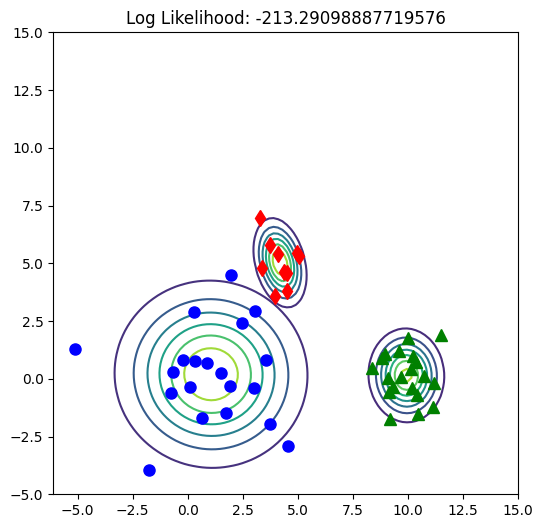

In [57]:
 

def MLE(X):
    mu_MLE = np.zeros((3, 2))
    sig_MLE = np.zeros((3, 2, 2))

    for i, X_data in enumerate([X0, X1, X2]):
        mu_MLE[i] = np.mean(X_data, axis=0)
        sig_MLE[i] = np.cov(X_data.T)

    #Plot gaussians with the MLE parameters
    fig, axs = plt.subplots(1, 1, figsize=(6, 6))

    X_grid = np.linspace(-5, 15, 100)
    Y_grid = np.linspace(-5, 15, 100)
    pos = np.dstack(np.meshgrid(X_grid, Y_grid))

    #plot contours of mu_MLE
    axs.contour(X_grid, Y_grid, scipy.stats.multivariate_normal(mu_MLE[0], sig_MLE[0]).pdf(pos))
    axs.contour(X_grid, Y_grid, scipy.stats.multivariate_normal(mu_MLE[1], sig_MLE[1]).pdf(pos))
    axs.contour(X_grid, Y_grid, scipy.stats.multivariate_normal(mu_MLE[2], sig_MLE[2]).pdf(pos))

    #plot data
    axs.plot(X0[:, 0], X0[:, 1], 'bo', markersize=8)
    axs.plot(X1[:, 0], X1[:, 1], 'rd', markersize=8)
    axs.plot(X2[:, 0], X2[:, 1], 'g^', markersize=8)

    axs.title.set_text(f"Log Likelihood: {likelihood(X, mu_MLE, sig_MLE, gt_M)}")

MLE(X)


deviation.shape (20, 2)
deviation.shape (10, 2)
deviation.shape (20, 2)


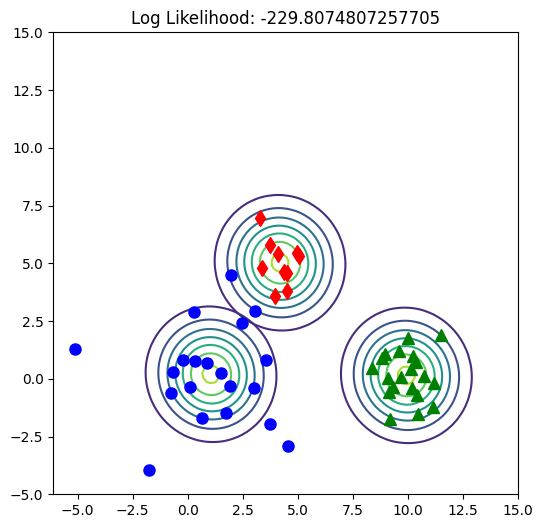

In [63]:

def MLE_with_tied_cov(X):
    mu_MLE = np.zeros((3, 2))
    sig_MLE = np.zeros((2, 2))

    # calculate means
    for i, X_data in enumerate([X0, X1, X2]):
        mu_MLE[i] = np.mean(X_data, axis=0)

    # calculate tied covariance
    for i, X_data in enumerate([X0, X1, X2]):
        deviation = X_data - mu_MLE[i]
        print("deviation.shape", deviation.shape)
        sig_MLE += (1. / len(X)) * deviation.T @ deviation  # weighted by the responsibilities

    # Plot gaussians with the MLE parameters
    fig, axs = plt.subplots(1, 1, figsize=(6, 6))

    X_grid = np.linspace(-5, 15, 100)
    Y_grid = np.linspace(-5, 15, 100)
    pos = np.dstack(np.meshgrid(X_grid, Y_grid))

    # plot contours of mu_MLE
    for mu in mu_MLE:
        axs.contour(X_grid, Y_grid, scipy.stats.multivariate_normal(mu, sig_MLE).pdf(pos))

    # plot data
    axs.plot(X0[:, 0], X0[:, 1], 'bo', markersize=8)
    axs.plot(X1[:, 0], X1[:, 1], 'rd', markersize=8)
    axs.plot(X2[:, 0], X2[:, 1], 'g^', markersize=8)

    axs.title.set_text(f"Log Likelihood: {likelihood(X, mu_MLE, [sig_MLE]*3, gt_M)}")

MLE_with_tied_cov(X)
